Imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [22]:
file = pd.ExcelFile("../../../data/v7/Handball 3. Liga vom 23.01.2023.xlsx")

file.sheet_names

df = file.parse('3. Liga')

# drop last col comments
df = df.iloc[:, :-1]
df.columns

Index(['Heimmannschaft', 'Gastmannschaft', 'Spieltag', 'Name', 'Spielminute',
       'Differenz Pfiff 1 und 2 (in Sekunden)', 'Tore Verein', 'Tore Gegner',
       'Torwartposition (1 = vorne, 2 = hinten)',
       'Wurf erfolgreich (0= Nein, 1 = Ja, 2 = im Nachwurf)',
       'L-R-Händer (1= Rechtshänder; 2= Linkshänder)', 'Wurfrichtung (1-9)?',
       'Drucksituation?\n0 = Nein, 1 = Torwartwechsel\n2 = letzter 7 Meter gehalten\n3 = Tordifferenz =< 4 + ab 50. Spielminute\n4 = 1 + 2, 5 = 1 + 3, 6 = 2 + 3, 7 = 1 + 2 + 3, 8 = letzer 7-Meter erst im Nachwurf erfolgreich',
       'Anzahl 7-Meter im Spiel (der wievielte 7-Meter im Spiel vom Spieler)',
       'Wurfquadrant des letzten 7-Meters (1-9)',
       'letzter 7-Meter erfolgreich \n(1= ja; 0= Nein; 2 = im Nachwurf erfolgreich)?'],
      dtype='object')

Cleanup & Renaming

In [23]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
#df.dropna(inplace=True)
df.replace('-', np.nan,inplace=True)
df.columns =[ 'homeTeam','opponentTeam','day','name','playTime',
              'whistleThrowTime','homeGoals','opponentGoals','goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection','pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','playTime':'float16',
              'homeGoals':'float16','opponentGoals':'float16','whistleThrowTime':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16' })
df.head()
pd.set_option("display.max_rows", None, "display.max_columns", None)

177.0
['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '120-130', '130-140', '140-150', '150-160', '160-170', '170-180']


throwSuccess,Fail,Success
whistleThrowTimeGroup,,
0-10,NaN,1.000000
10-20,0.233333,0.766667
20-30,0.197080,0.802920
30-40,0.156863,0.843137
40-50,0.185185,0.814815
50-60,NaN,1.000000
60-70,0.222222,0.777778
70-80,NaN,1.000000
80-90,NaN,1.000000


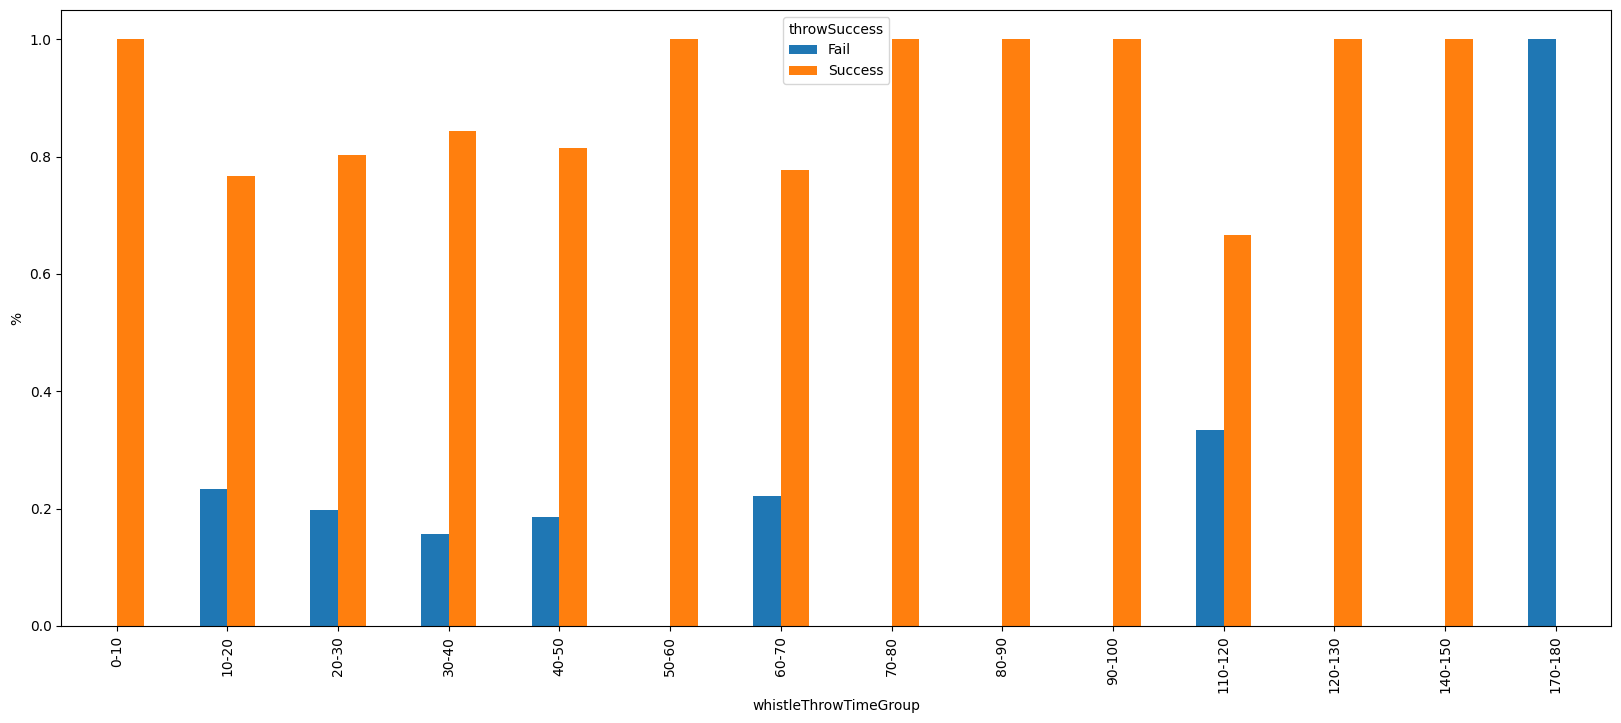

In [24]:
df1 = df.loc[:,('whistleThrowTime','throwSuccess')].copy()
df1.dropna(inplace=True)
df1['throwSuccess'].replace(2.0, 1.0,inplace=True)
df1['throwSuccess'].replace(1.0, 'Success',inplace=True)
df1['throwSuccess'].replace(0.0, 'Fail',inplace=True)

#Range 1-60
start = 0
print(df1['whistleThrowTime'].max())
stop = 180
step = 10
binLabels = [str(num) + '-' + str(num + step) for num in range(start, stop,step)]
print(binLabels)
df1['whistleThrowTimeGroup'] = pd.cut(df1.whistleThrowTime,[num for num in range(start, stop+1,step)], labels=binLabels)
df1.drop(columns=['whistleThrowTime'],inplace=True)
df2 = df1.groupby('whistleThrowTimeGroup',observed = True).throwSuccess.value_counts(normalize=True)
df2.unstack().plot.bar(ylabel='%',figsize=(20,8))
df2.unstack()

In [25]:
df3 = df1.groupby('whistleThrowTimeGroup',observed = True).throwSuccess.value_counts(normalize=False)
df3.unstack()

throwSuccess,Fail,Success
whistleThrowTimeGroup,,
0-10,NaN,1.0
10-20,14.0,46.0
20-30,27.0,110.0
30-40,16.0,86.0
40-50,5.0,22.0
50-60,NaN,6.0
60-70,2.0,7.0
70-80,NaN,3.0
80-90,NaN,2.0
